In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd "/content/drive/MyDrive/Colab/COMP7409_ML_in_TF_GroupProject"

/content/drive/MyDrive/Colab/COMP7409_ML_in_TF_GroupProject


In [1]:
!pip install vaderSentiment

!pip install yfinance

!pip install scikeras[tensorflow]

     |████████████████████████████████| 125 kB 8.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 20.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 462 kB 8.8 MB/s 
     |████████████████████████████████| 97 kB 1.8 MB/s 
  Attempting uninstall: importlib-metadata
 

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## **Add Sentiment Label Manually**
****Skip this part if coin_desk_eth_sentiment_modified.csv is used***

Add labels (i.e. positive, negative, neutral) and save as "coin_desk_eth_sentiment.csv"

In [ ]:
# origninal csv from scrapper
df= pd.read_csv('coin_desk_eth.csv', sep=',')
df = df[::-1] #save the news in ascending order of date
df.head(10)

,Unnamed: 0,headline,desc,overall_sentiment,sentiment_label_headline,sentiment_score_headline,sentiment_label_desc,sentiment_score_desc,date
0,1928,Governments Will Start to Hodl Bitcoin in 2021',Crypto assets not only are not going away. The...,Positive,Neutral,0.0000,Positive,0.1779,2021-01-01
1,1927,Why Crypto Crosses 'The Chasm' in a Post-Coron...,2020 will be looked back on as the year that m...,Positive,Neutral,0.0000,Positive,0.3612,2021-01-01
2,1926,Crypto Dollars and CBDCs: The Battle to Come',The future of money will be a tussle between a...,Negative,Negative,-0.3818,Neutral,0.0000,2021-01-01
3,1925,Lessons in Failing to Apply Blockchain and AI ...,Blockchain tech is well suited to manage aspec...,Negative,Negative,-0.6908,Negative,-0.1280,2021-01-02
4,1924,Why Impact Investing and Crypto Are Mutually B...,Two of the fastest growing alternative investm...,Positive,Positive,0.4404,Positive,0.5574,2021-01-03
5,1923,"Ether Hits $1,000 for First Time Since 2018, H...",The native currency of the Ethereum network hi...,Neutral,Neutral,0.0000,Neutral,0.0000,2021-01-03
6,1922,The Rise of Layer 2s Spells End for Altcoins',Bitcoin is no longer limited to a single chain...,Positive,Neutral,0.0000,Positive,0.2420,2021-01-04
7,1921,"Ether Price Passes $1,150 to Hit Highest Since...","Ethereum's native cryptocurrency, ether, jumpe...",Positive,Neutral,0.0000,Positive,0.5267,2021-01-04
8,1920,"Blockchain Bites: $10B in Bitcoin Futures, Pri...",A correction in bitcoin's price (from all-time...,Neutral,Neutral,0.0000,Neutral,0.0000,2021-01-05
9,1919,Crypto Markets Jump on OCC Approval for Banks ...,The price of bitcoin and native tokens for oth...,Positive,Positive,0.4767,Positive,0.4215,2021-01-05


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        label = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        label = "Negative"
 
    else :
        label = "Neutral"
    
    return sentiment_dict['compound'], label

In [4]:
def update_sentiment(df, text_label=False):

  sentiment_label_headline = []
  sentiment_score_headline = []
  sentiment_label_desc = []
  sentiment_score_desc = []

  for i in df['headline'].values:
    score, label = sentiment_scores(i)
    sentiment_score_headline.append(score)
    sentiment_label_headline.append(label)

  for i in df['desc'].values:
    score, label = sentiment_scores(i)
    sentiment_score_desc.append(score)
    sentiment_label_desc.append(label)

  if text_label == True:
    df['sentiment_label_headline'] = sentiment_label_headline
    df['sentiment_label_desc'] = sentiment_label_desc
    
  df['sentiment_score_headline'] = sentiment_score_headline
  df['sentiment_score_desc'] = sentiment_score_desc

In [ ]:
# using VADER to assist manual labelling
update_sentiment(df, text_label = True)
df.to_csv("coin_desk_eth_sentiment.csv")

## **Read Labelled Data**

In [9]:
# modified: remove duplicated rows, add labels manually
df= pd.read_csv('coin_desk_eth_sentiment_modified.csv', sep=',')
df = df[['headline', 'desc', 'date', 'overall_sentiment', 'sentiment_label_headline', 'sentiment_score_headline', 'sentiment_label_desc', 'sentiment_score_desc']]
# update_sentiment(df)  # update sentiment for spanish rows
df.to_csv("coin_desk_eth_sentiment_modified.csv", index=False)
df.head(10)

,headline,desc,date,overall_sentiment,sentiment_label_headline,sentiment_score_headline,sentiment_label_desc,sentiment_score_desc
0,Governments Will Start to Hodl Bitcoin in 2021',Crypto assets not only are not going away. The...,2021-01-01,Positive,Neutral,0.0000,Positive,0.1779
1,Why Crypto Crosses 'The Chasm' in a Post-Coron...,2020 will be looked back on as the year that m...,2021-01-01,Positive,Neutral,0.0000,Positive,0.3612
2,Crypto Dollars and CBDCs: The Battle to Come',The future of money will be a tussle between a...,2021-01-01,Negative,Negative,-0.3818,Neutral,0.0000
3,Lessons in Failing to Apply Blockchain and AI ...,Blockchain tech is well suited to manage aspec...,2021-01-02,Negative,Negative,-0.6908,Negative,-0.1280
4,Why Impact Investing and Crypto Are Mutually B...,Two of the fastest growing alternative investm...,2021-01-03,Positive,Positive,0.4404,Positive,0.5574
5,"Ether Hits $1,000 for First Time Since 2018, H...",The native currency of the Ethereum network hi...,2021-01-03,Neutral,Neutral,0.0000,Neutral,0.0000
6,The Rise of Layer 2s Spells End for Altcoins',Bitcoin is no longer limited to a single chain...,2021-01-04,Positive,Neutral,0.0000,Positive,0.2420
7,"Ether Price Passes $1,150 to Hit Highest Since...","Ethereum's native cryptocurrency, ether, jumpe...",2021-01-04,Positive,Neutral,0.0000,Positive,0.5267
8,"Blockchain Bites: $10B in Bitcoin Futures, Pri...",A correction in bitcoin's price (from all-time...,2021-01-05,Neutral,Neutral,0.0000,Neutral,0.0000
9,Crypto Markets Jump on OCC Approval for Banks ...,The price of bitcoin and native tokens for oth...,2021-01-05,Positive,Positive,0.4767,Positive,0.4215


In [10]:
# data preprocessing, original #rows = 1919
df.dropna(subset=['date'], inplace=True)  #remove rows with empty date, 1 row removed
df = df[df['headline'].str.split().str.len().gt(2)]  #remove biography, 12 rows removed
df.dropna(subset=['overall_sentiment'], inplace=True)  #remove rows with empty true label, i.e. sponsor ads, 2 row removed
df['sentiment_labels'] = df['overall_sentiment'].factorize()[0]
print("Dataset size: ", df.shape[0])

Dataset size:  1904


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(df['overall_sentiment'].value_counts())

Neutral     894
Positive    714
Negative    296
Name: overall_sentiment, dtype: int64


In [17]:
# Split into Train and Test Sets - 0.75:0.25
df['combined_text'] = df['headline'] + ". " + df['desc']
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df[["headline", "desc", "combined_text", "date"]], df['sentiment_labels'], 
    shuffle=True, random_state=42)
print("Train Set size: ", train_labels.shape[0])
print("Test Set size: ", test_labels.shape[0])

Train Set size:  1428
Test Set size:  476


## **Apply VADER**
Use training set to find out the best parameters and then use the best parameters to apply VADER to test set

Parameters:
1. threshold: 
*   positive sentiment: >= (+ve threshold)
*   negative sentiment: >= (-ve threshold)
*   neutral sentiment:  > (-ve threshold) and < (+ve threshold)

  
2. headline_factor: proportion of sentiment score in the news headline

In [ ]:
# return sentiment labels based on input threshold
def get_sentiment_labels(scores, threshold):
  vader_labels = []
  for score in scores:
    if score >= threshold:
      vader_labels.append(0) #positive
    elif score <= -threshold:
      vader_labels.append(1) #negative
    else:
      vader_labels.append(2) #neutral
  
  return vader_labels

In [ ]:
# generate sentiment labels by VADER
def vader_optimized_threshold(train_texts, train_labels, test_texts, test_labels):

  best_accuracy = 0
  best_threshold = 0
  best_hl_factor = 0
  vader_labels_best = []
  thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.5, 0.7]
  headline_factors = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

  update_sentiment(train_texts)
  update_sentiment(test_texts)

  for hl_factor in headline_factors:
    train_sentiment_scores = (1 - hl_factor) * train_texts.sentiment_score_desc + \
    hl_factor * train_texts.sentiment_score_headline
    test_sentiment_scores = (1 - hl_factor) * test_texts.sentiment_score_desc + \
    hl_factor * test_texts.sentiment_score_headline

    # use trainset to find out the best threshold
    for threshold in thresholds:
      train_vader_labels = get_sentiment_labels(train_sentiment_scores, threshold)
      result = metrics.classification_report(train_labels, train_vader_labels, output_dict=True)
      if result['accuracy'] > best_accuracy:
        best_accuracy = result['accuracy']
        best_threshold = threshold
        best_hl_factor = hl_factor
        train_texts['vader_labels'] = train_vader_labels

  print("Trainset: best threshold - {thres}, best headline factor - {factor}, accuracy - {acc}".format(thres=best_threshold, factor=best_hl_factor, acc=best_accuracy))
  test_vader_labels = get_sentiment_labels(test_sentiment_scores, best_threshold)
  result = metrics.classification_report(test_labels, test_vader_labels, output_dict=True)
  print("Testset: threshold used - {thres}, headline factor used - {factor}, accuracy - {acc}".format(thres=best_threshold, factor=best_hl_factor, acc=result['accuracy']))
  print(metrics.classification_report(test_labels, test_vader_labels, output_dict=False))
  test_texts['vader_labels'] = test_vader_labels

In [ ]:
# before text preprocessing
vader_sentiment = vader_optimized_threshold(train_texts, train_labels, test_texts, test_labels)

Trainset: best threshold - 0.07, best headline factor - 0.8, accuracy - 0.572829131652661
Testset: threshold used - 0.07, headline factor used - 0.8, accuracy - 0.5315126050420168
              precision    recall  f1-score   support

           0       0.52      0.34      0.41       180
           1       0.59      0.46      0.52        78
           2       0.53      0.71      0.60       218

    accuracy                           0.53       476
   macro avg       0.54      0.51      0.51       476
weighted avg       0.53      0.53      0.52       476



## **LSTM - Without Text Preprocessing**

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Thu Mar 24 17:22:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |            

In [11]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.8.0
/device:GPU:0


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense ,Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

In [19]:
b = df.combined_text.str.split(" ")
max_size = 0
max_index = 0
for index, tokens in enumerate(df.combined_text):
  if len(tokens.split()) > max_size:
    max_index = index
    max_size = len(tokens.split())
    print(f"mindex: {max_index}, length: {max_size}, tokens: {tokens}")

mindex: 0, length: 31, tokens: Governments Will Start to Hodl Bitcoin in 2021'. Crypto assets not only are not going away. They will become integral to our financial and political lives, says Blockchain.com's head of research.'
mindex: 6, length: 32, tokens: The Rise of Layer 2s Spells End for Altcoins'. Bitcoin is no longer limited to a single chain, meaning altcoins like ether are trending towards irrelevancy, says the neuroscientist and DeFi entrepreneur.'
mindex: 8, length: 43, tokens: Blockchain Bites: $10B in Bitcoin Futures, Price Wobbles and Liquidations'. A correction in bitcoin's price (from all-time highs) led to $1 billion in liquidated options positions. Ukraine announced a Stellar-based CBDC experiment and a much-awaited Ethereum layer 2 set a tentative launch date.'
mindex: 51, length: 48, tokens: First Mover: Don't Like $34K Bitcoin? Stellar, Litecoin Yet to Conquer Old Highs'. Though bitcoin's rally has lost some steam, many traders are still in a bullish mood – and sh

In [13]:
def create_model(vocab_size, embedding_vector_length, input_length, trainable, dropout_spatial, units, 
                 dropout_rate_lstm, dropout_rate_lstm_recurrent, dropout_rate):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_vector_length,     
                                      input_length=input_length, trainable=trainable) )
  model.add(SpatialDropout1D(dropout_spatial))
  model.add(LSTM(units, dropout=dropout_rate_lstm, recurrent_dropout=dropout_rate_lstm_recurrent))
  model.add(Dropout(dropout_rate))
  model.add(Dense(3, activation='softmax'))
  # model.compile(loss='categorical_crossentropy',optimizer='adam', 
  #                           metrics=['accuracy'])
  return model

In [21]:
def optimize_lstm_1(train_news, train_labels, test_news, test_labels, param_grid, num_words_list=[500, 2000, 5000]):

  # convert to [positive, negative, neutral] for multi-class output in LSTM
  # if (train_labels.shape[1] != 3):
  if np.ndim(train_labels) == 1:
    train_labels = to_categorical(train_labels, 3)
    test_labels = to_categorical(test_labels, 3)

  best_result = 0.0
  best_model = []
  best_tokenizer = []
  grid_results = []
  # cv=[(slice(None), slice(None))]

  for num_words in num_words_list:
    news = train_news.values
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(news)
    vocab_size = len(tokenizer.word_index) + 1
    encoded_docs = tokenizer.texts_to_sequences(news)
    padded_sequence = pad_sequences(encoded_docs, maxlen=param_grid['input_length'][0])

    param_grid['vocab_size'] = [vocab_size]
    print(param_grid)

    # checkpoint = ModelCheckpoint("checkpoints/", monitor='val_acc', verbose=2, save_best_only=True, mode='max')
    csv_logger = CSVLogger(f'log_lstm1_{num_words}.csv', append=True, separator=',')
    model = KerasClassifier(metrics=['mae', 'acc'], loss="categorical_crossentropy", optimizer="adam",model=create_model, 
                            vocab_size=5000, embedding_vector_length=32, input_length=50, 
                            trainable=True, dropout_spatial=0.5, units=20, 
                            dropout_rate_lstm=0.5, dropout_rate_lstm_recurrent=0.5, 
                            dropout_rate=0.5, verbose=2, validation_split=0.2, 
                            callbacks=[csv_logger])
    # n_jobs must be 1
    grid = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid, 
                        n_jobs=1, cv=3, verbose=2, error_score='raise')
    print(f"For num_words = {num_words}: ")
    
    grid_result = grid.fit(padded_sequence, train_labels, validation_split=0.2, 
                           epochs=50, verbose=2)
    grid_results.append(grid_result)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    if best_result < grid_result.best_score_:
      best_result = grid_result.best_score_
      best_model.append(grid_result.best_estimator_)
      best_tokenizer.append(tokenizer)

    # prediction
    test_tokens = tokenizer.texts_to_sequences(test_news)
    test_tokens = pad_sequences(test_tokens, maxlen = 75)
    prediction = best_model[-1].predict(test_tokens) 
    prediction_classes = np.argmax(prediction,axis=1)
    result = metrics.classification_report(np.argmax(test_labels, axis=1), prediction_classes)
    print("Best result: ", result)

  return grid_results, best_tokenizer[-1], best_model[-1]

In [20]:
# define parameters grid for GridSearchCV, recurrent_dropout must be 0.0 if 
# we want to speed up LSTM training with GPU and cuDNN
num_words_list = [500, 2000, 5000]
param_grid = {'units': [20, 50], 'dropout_spatial': [0.3, 0.6], 
               'dropout_rate_lstm': [0.2, 0.5, 0.7], 'dropout_rate_lstm_recurrent': [0.0], 
               'dropout_rate': [0.2, 0.5, 0.7], 'batch_size': [32], 'embedding_vector_length': [32], 
               'input_length': [75], 'trainable': [True]}

In [22]:
grid_results, best_tokenizer, best_model = optimize_lstm_1(train_texts['combined_text'], train_labels, test_texts['combined_text'], test_labels, param_grid)

Streaming output truncated to the last 5000 lines.
Epoch 23/50
24/24 - 0s - loss: 0.1727 - mean_absolute_error: 0.0768 - acc: 0.9474 - val_loss: 1.7949 - val_mean_absolute_error: 0.3682 - val_acc: 0.4503 - 213ms/epoch - 9ms/step
Epoch 24/50
24/24 - 0s - loss: 0.1795 - mean_absolute_error: 0.0787 - acc: 0.9501 - val_loss: 1.9639 - val_mean_absolute_error: 0.3550 - val_acc: 0.4921 - 228ms/epoch - 10ms/step
Epoch 25/50
24/24 - 0s - loss: 0.1463 - mean_absolute_error: 0.0644 - acc: 0.9658 - val_loss: 2.0935 - val_mean_absolute_error: 0.3560 - val_acc: 0.4764 - 225ms/epoch - 9ms/step
Epoch 26/50
24/24 - 0s - loss: 0.1482 - mean_absolute_error: 0.0574 - acc: 0.9645 - val_loss: 2.2387 - val_mean_absolute_error: 0.3471 - val_acc: 0.5131 - 234ms/epoch - 10ms/step
Epoch 27/50
24/24 - 0s - loss: 0.1529 - mean_absolute_error: 0.0630 - acc: 0.9645 - val_loss: 1.9122 - val_mean_absolute_error: 0.3681 - val_acc: 0.4764 - 254ms/epoch - 11ms/step
Epoch 28/50
24/24 - 0s - loss: 0.1616 - mean_absolute_er

In [23]:
for i in range(3):
  print(f"best accuracy with num_words={num_words_list[i]}: ", grid_results[i].best_score_)
  print(f"best hyper-parameters with num_words={num_words_list[i]}: ", grid_results[i].best_params_)

test_tokens = best_tokenizer.texts_to_sequences(test_texts['combined_text'])
test_tokens = pad_sequences(test_tokens, maxlen = param_grid['input_length'][0])
prediction = best_model.predict(test_tokens) 
prediction_classes = np.argmax(prediction,axis=1)
result = metrics.classification_report(test_labels, prediction_classes)
print("Best result: ", result)

best accuracy with num_words=500:  0.5448179271708683
best hyper-parameters with num_words=500:  {'batch_size': 32, 'dropout_rate': 0.7, 'dropout_rate_lstm': 0.7, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 20, 'vocab_size': 7516}
best accuracy with num_words=2000:  0.5364145658263305
best hyper-parameters with num_words=2000:  {'batch_size': 32, 'dropout_rate': 0.7, 'dropout_rate_lstm': 0.7, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 20, 'vocab_size': 7516}
best accuracy with num_words=5000:  0.5322128851540616
best hyper-parameters with num_words=5000:  {'batch_size': 32, 'dropout_rate': 0.5, 'dropout_rate_lstm': 0.7, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 20, 'vocab_size': 7516}
15/15 - 0s - 55ms/

## **LSTM - With Text Preprocessing**

In [24]:
import spacy
import nltk
import re
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-29 11:08:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-29 11:08:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-29 11:08:01--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [26]:
# Initialize spacy ‘en’ model, keeping only component needed for lemmatization and creating an engine:
nlp = spacy.load('en', disable=['parser', 'ner'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords_lower = [s.lower() for s in stopwords]

### Text Preprocessing Functions

In [27]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

  return word_to_vec_map

In [28]:
def remove_symbols(str_input): 
  #tokenization, remove punctuation
  tokens = [str(token) for token in nlp(str_input.lower().strip())]

  # # remove 's, .com, '
  tokens = [re.sub(r"(\'s)$", "", str(token)) for token in tokens] #remove 's and .com
  tokens = [re.sub(r"(\.com)$", "", token) for token in tokens]
  tokens = [re.sub(r"\'$|^\'", "", token) for token in tokens]

  # remove .com, @, symbols, websites, email addresses 
  tokens = [re.sub(r"\@\S", "", token) for token in tokens]
  tokens = [re.sub(r"[^a-z\.\,\-\?]", "", token) for token in tokens] #remove symbols

  tokens = [token for token in tokens if token!=' ']
  tokens = [token for token in tokens if len(token) > 1] 

  #combine a list into one string   
  string = " ".join(tokens)
  return string

In [29]:
def full_text_preprocessing(str_input): 
  #lemmatization
  tokens = [token.lemma_ for token in nlp(str_input.lower().strip())]

  tokens = [re.sub(r"(\'s)$", "", str(token)) for token in tokens] #remove 's and .com
  tokens = [re.sub(r"(\.com)$", "", token) for token in tokens]
  tokens = [re.sub(r"\'$|^\'", "", token) for token in tokens]

  # remove .com, @, symbols, websites, email addresses 
  tokens = [re.sub(r"\@\S", "", token) for token in tokens]
  tokens = [re.sub(r"[^a-z\.\,\-\?]", "", token) for token in tokens] #remove symbols
  

  tokens = [token for token in tokens if token!=' ']
  tokens = [token for token in tokens if len(token) > 1] 

  #remove stopwords     
  tokens = [token for token in tokens if token not in stopwords_lower]

  #combine a list into one string   
  string = " ".join(tokens)
  return string

### LSTM
*   Removing symbols
*   GloVe Vectors: https://nlp.stanford.edu/projects/glove/
    (Wikipedia 2014 + Gigaword 5 50d vectors is used)


In [30]:
word_to_vec_map = read_glove_vector('glove.6B.50d.txt')

In [31]:
word_to_vec_map['government']

array([ 0.38797  , -1.0825   ,  0.45025  , -0.23341  ,  0.086307 ,
       -0.25721  , -0.18281  , -0.10037  , -0.50099  , -0.58361  ,
       -0.052635 , -0.14224  ,  0.0090217, -0.38308  ,  0.18503  ,
        0.42444  ,  0.10611  , -0.1487   ,  1.0801   ,  0.065757 ,
        0.64552  ,  0.1908   , -0.14561  , -0.87237  , -0.35568  ,
       -2.435    ,  0.28428  , -0.33436  , -0.56139  ,  0.91404  ,
        4.0129   ,  0.072234 , -1.2478   , -0.36592  , -0.50236  ,
        0.011731 , -0.27409  , -0.50842  , -0.2584   , -0.096172 ,
       -0.67109  ,  0.40226  ,  0.27912  , -0.37317  , -0.45049  ,
       -0.30662  , -1.6426   ,  1.1936   ,  0.65343  , -0.76293  ])

In [32]:
df_cleaned = df.copy()
df_cleaned['cleaned_headline'] = df_cleaned['headline'].apply(remove_symbols)
df_cleaned['cleaned_desc'] = df_cleaned['desc'].apply(remove_symbols)
df_cleaned['cleaned_combined_text'] = df_cleaned['cleaned_headline'] + " . " + df_cleaned['cleaned_desc']
print(df_cleaned['cleaned_combined_text'].head(10))

0    governments will start to hodl bitcoin in . cr...
1    why crypto crosses the chasm in post coronavir...
2    crypto dollars and cbdcs the battle to come . ...
3    lessons in failing to apply blockchain and ai ...
4    why impact investing and crypto are mutually b...
5    ether hits for first time since hours after cr...
6    the rise of layer spells end for altcoins . bi...
7    ether price passes to hit highest since januar...
8    blockchain bites in bitcoin futures price wobb...
9    crypto markets jump on occ approval for banks ...
Name: cleaned_combined_text, dtype: object


In [33]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_cleaned[["headline", "desc", "cleaned_headline",
                "cleaned_desc", "cleaned_combined_text", "date"]], 
                df_cleaned['sentiment_labels'], shuffle=True, random_state=42)

In [34]:
b = df_cleaned.cleaned_combined_text.str.split(" ")
max_size = 0
max_index = 0
for index, tokens in enumerate(df_cleaned.cleaned_combined_text):
  if len(tokens.split()) > max_size:
    max_index = index
    max_size = len(tokens.split())
    print(f"mindex: {max_index}, length: {max_size}, tokens: {tokens}")

mindex: 0, length: 31, tokens: governments will start to hodl bitcoin in . crypto assets not only are not going away they will become integral to our financial and political lives says blockchain head of research
mindex: 3, length: 33, tokens: lessons in failing to apply blockchain and ai to combat covid . blockchain tech is well suited to manage aspects of the fight against the coronavirus why has nt it been used more
mindex: 8, length: 40, tokens: blockchain bites in bitcoin futures price wobbles and liquidations . correction in bitcoin price from all time highs led to billion in liquidated options positions ukraine announced stellar based cbdc experiment and much awaited ethereum layer set tentative launch date
mindex: 49, length: 41, tokens: how the occ is building crypto america and saving banks from extinction . three interpretative letters from the office of the comptroller of the currency lay the groundwork for banks to become crypto custodians payment companies and miners in b

In [35]:
def create_model_2(vocab_size, embedding_vector_length, input_length, trainable, dropout_spatial, units, 
                dropout_rate_lstm, dropout_rate_lstm_recurrent, dropout_rate, embed_weights):
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_vector_length,     
                      input_length=input_length, trainable=trainable, 
                      weights=[embed_weights]))
  model.add(SpatialDropout1D(dropout_spatial))
  model.add(LSTM(units, dropout=dropout_rate_lstm, recurrent_dropout=dropout_rate_lstm_recurrent))
  model.add(Dropout(dropout_rate))
  model.add(Dense(3, activation='softmax'))
  # model.compile(loss='categorical_crossentropy',optimizer='adam', 
  #                           metrics=['accuracy'])
  return model

In [36]:
def optimize_lstm_2(train_news, train_labels, test_news, test_labels, param_grid, num_words_list=[200, 2000, 5000]):



  # convert to [positive, negative, neutral] for multi-class output in LSTM
  # if (train_labels.shape[1] != 3):
  if np.ndim(train_labels) == 1:
    train_labels = to_categorical(train_labels, 3)
    test_labels = to_categorical(test_labels, 3)

  best_result = 0.0
  best_model = []
  best_tokenizer = []
  grid_results = []
  # cv=[(slice(None), slice(None))]
  
  for num_words in num_words_list:
    news = train_news.values
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(news)
    vocab_size = len(tokenizer.word_index)+1
    embed_vector_len = word_to_vec_map['any'].shape[0]
    embed_matrix = np.zeros((vocab_size, embed_vector_len))

    for word, index in tokenizer.word_index.items():
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is not None:
        embed_matrix[index, :] = embedding_vector

    encoded_texts = tokenizer.texts_to_sequences(news)
    padded_sequence = pad_sequences(encoded_texts, maxlen=param_grid['input_length'][0], padding='post')

    param_grid['embed_weights'] = [embed_matrix]
    param_grid['embedding_vector_length'] = [embed_vector_len]
    param_grid['vocab_size'] = [vocab_size]

    csv_logger = CSVLogger(f'log_lstm1_{num_words}.csv', append=True, separator=',')
    model = KerasClassifier(metrics=['mae', 'acc'], loss="categorical_crossentropy", optimizer="adam",model=create_model_2, 
                            vocab_size=5000, embedding_vector_length=embed_vector_len, input_length=75, 
                            trainable=True, embed_weights=[embed_matrix], dropout_spatial=0.5, units=20, 
                            dropout_rate_lstm=0.5, dropout_rate_lstm_recurrent=0.5, 
                            dropout_rate=0.5, verbose=2, validation_split=0.2, 
                            callbacks=[csv_logger])
    # n_jobs must be 1
    grid = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid, 
                        n_jobs=1, cv=3, verbose=2, error_score='raise')
    print(f"For num_words = {num_words}: ")
    
    grid_result = grid.fit(padded_sequence, train_labels, validation_split=0.2, 
                           epochs=50, verbose=2)
    grid_results.append(grid_result)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    if best_result < grid_result.best_score_:
      best_result = grid_result.best_score_
      best_model.append(grid_result.best_estimator_)
      best_tokenizer.append(tokenizer)

    # prediction
    encoded_texts = tokenizer.texts_to_sequences(test_news)
    encoded_texts = pad_sequences(encoded_texts, maxlen=param_grid['input_length'][0], padding='post')
    prediction = best_model[-1].predict(encoded_texts) 
    prediction_classes = np.argmax(prediction,axis=1)
    result = metrics.classification_report(np.argmax(test_labels, axis=1), prediction_classes)
    print("Best result: ", result)

  return grid_results, best_tokenizer[-1], best_model[-1]

In [37]:
param_grid = {'units': [20, 50], 'dropout_spatial': [0.3, 0.6], 
               'dropout_rate_lstm': [0.2, 0.5, 0.7], 'dropout_rate_lstm_recurrent': [0.0], 
               'dropout_rate': [0.2, 0.5, 0.7], 'batch_size': [32], 'embedding_vector_length': [32], 
               'input_length': [75], 'trainable': [False]}

In [38]:
# train the new cleaned data in the defined model
grid_results_2, best_tokenizer_2, best_model_2 = optimize_lstm_2(train_texts['cleaned_combined_text'], train_labels, test_texts['cleaned_combined_text'], test_labels, param_grid)

Streaming output truncated to the last 5000 lines.
Epoch 12/50
24/24 - 0s - loss: 0.9919 - mean_absolute_error: 0.3993 - acc: 0.5072 - val_loss: 1.0703 - val_mean_absolute_error: 0.4177 - val_acc: 0.4031 - 202ms/epoch - 8ms/step
Epoch 13/50
24/24 - 0s - loss: 0.9949 - mean_absolute_error: 0.4012 - acc: 0.5138 - val_loss: 1.0655 - val_mean_absolute_error: 0.4197 - val_acc: 0.4031 - 209ms/epoch - 9ms/step
Epoch 14/50
24/24 - 0s - loss: 0.9884 - mean_absolute_error: 0.3996 - acc: 0.5125 - val_loss: 1.0679 - val_mean_absolute_error: 0.4197 - val_acc: 0.4031 - 210ms/epoch - 9ms/step
Epoch 15/50
24/24 - 0s - loss: 0.9921 - mean_absolute_error: 0.4016 - acc: 0.5138 - val_loss: 1.0662 - val_mean_absolute_error: 0.4196 - val_acc: 0.4031 - 233ms/epoch - 10ms/step
Epoch 16/50
24/24 - 0s - loss: 0.9899 - mean_absolute_error: 0.4008 - acc: 0.5138 - val_loss: 1.0702 - val_mean_absolute_error: 0.4182 - val_acc: 0.4031 - 199ms/epoch - 8ms/step
Epoch 17/50
24/24 - 0s - loss: 0.9873 - mean_absolute_erro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Epoch 12/50
24/24 - 0s - loss: 0.9817 - mean_absolute_error: 0.3919 - acc: 0.5099 - val_loss: 1.0591 - val_mean_absolute_error: 0.4168 - val_acc: 0.4031 - 221ms/epoch - 9ms/step
Epoch 13/50
24/24 - 0s - loss: 0.9934 - mean_absolute_error: 0.4032 - acc: 0.5033 - val_loss: 1.0524 - val_mean_absolute_error: 0.4176 - val_acc: 0.4031 - 213ms/epoch - 9ms/step
Epoch 14/50
24/24 - 0s - loss: 0.9873 - mean_absolute_error: 0.3947 - acc: 0.5099 - val_loss: 1.0447 - val_mean_absolute_error: 0.4214 - val_acc: 0.4084 - 259ms/epoch - 11ms/step
Epoch 15/50
24/24 - 0s - loss: 0.9926 - mean_absolute_error: 0.4058 - acc: 0.4980 - val_loss: 1.0447 - val_mean_absolute_error: 0.4161 - val_acc: 0.4084 - 212ms/epoch - 9ms/step
Epoch 16/50
24/24 - 0s - loss: 0.9760 - mean_absolute_error: 0.3944 - acc: 0.5112 - val_loss: 1.0365 - val_mean_absolute_error: 0.4172 - val_acc: 0.4084 - 221ms/epoch - 9ms/step
Epoch 17/50
24/24 - 0s - loss: 0.9755 - mean_absolute_erro

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Streaming output truncated to the last 5000 lines.
Epoch 11/50
24/24 - 0s - loss: 0.9885 - mean_absolute_error: 0.3996 - acc: 0.5138 - val_loss: 1.0660 - val_mean_absolute_error: 0.4175 - val_acc: 0.4031 - 197ms/epoch - 8ms/step
Epoch 12/50
24/24 - 0s - loss: 0.9915 - mean_absolute_error: 0.4041 - acc: 0.5099 - val_loss: 1.0695 - val_mean_absolute_error: 0.4161 - val_acc: 0.4031 - 202ms/epoch - 8ms/step
Epoch 13/50
24/24 - 0s - loss: 0.9779 - mean_absolute_error: 0.3944 - acc: 0.5125 - val_loss: 1.0723 - val_mean_absolute_error: 0.4152 - val_acc: 0.4031 - 253ms/epoch - 11ms/step
Epoch 14/50
24/24 - 0s - loss: 0.9847 - mean_absolute_error: 0.3957 - acc: 0.5151 - val_loss: 1.0612 - val_mean_absolute_error: 0.4180 - val_acc: 0.4031 - 235ms/epoch - 10ms/step
Epoch 15/50
24/24 - 0s - loss: 0.9872 - mean_absolute_error: 0.3986 - acc: 0.5138 - val_loss: 1.0640 - val_mean_absolute_error: 0.4155 - val_acc: 0.4031 - 199ms/epoch - 8ms/step
Epoch 16/50
24/24 - 0s - loss: 0.9879 - mean_absolute_err

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
for i in range(3):
  print(f"best accuracy with num_words={num_words_list[i]}: ", grid_results_2[i].best_score_)
  print(f"best hyper-parameters with num_words={num_words_list[i]}: ", grid_results_2[i].best_params_)

test_tokens = best_tokenizer_2.texts_to_sequences(test_texts['cleaned_combined_text'])
test_tokens = pad_sequences(test_tokens, maxlen = param_grid['input_length'][0])
prediction = best_model_2.predict(test_tokens) 
prediction_classes = np.argmax(prediction,axis=1)
result = metrics.classification_report(test_labels, prediction_classes)
print("Best result: ", result)

best accuracy with num_words=500:  0.5469187675070027
best hyper-parameters with num_words=500:  {'batch_size': 32, 'dropout_rate': 0.5, 'dropout_rate_lstm': 0.2, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embed_weights': array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.68047 , -0.039263,  0.30186 , ..., -0.073297, -0.064699,
        -0.26044 ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.48139 ,  0.16534 ,  0.63496 , ..., -0.76028 , -0.15133 ,
         0.63566 ],
       [ 0.59437 , -0.48271 ,  1.2364  , ..., -0.52703 , -0.079321,
         0.73899 ]]), 'embedding_vector_length': 50, 'input_length': 75, 'trainable': False, 'units': 50, 'vocab_size': 5952}
best accuracy with num_words=2000:  0.5532212885154061
best hyper-parameters with num_words=2000:  {'batch_size': 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LSTM
*   Remove symbols
*   Lemmatization
*   Remove stop words




In [41]:
df_cleaned = df.copy()
df_cleaned['cleaned_headline'] = df_cleaned['headline'].apply(full_text_preprocessing)
df_cleaned['cleaned_desc'] = df_cleaned['desc'].apply(full_text_preprocessing)
df_cleaned['cleaned_combined_text'] = df_cleaned['cleaned_headline'] + " " + df_cleaned['cleaned_desc']
print(df_cleaned['cleaned_combined_text'].head(10))

0    government start hodl bitcoin crypto asset go ...
1    crypto crosse chasm post coronavirus world loo...
2    crypto dollars cbdcs battle come future money ...
3    lesson fail apply blockchain ai combat covid b...
4    impact investing crypto mutually beneficial tw...
5    ether hit first time since hour cross native c...
6    rise layer spell end altcoin bitcoin longer li...
7    ether price pass hit high since january ethere...
8    blockchain bite bitcoin future price wobble li...
9    crypto market jump occ approval bank use block...
Name: cleaned_combined_text, dtype: object


In [42]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_cleaned[["headline", "desc", "cleaned_headline",
                "cleaned_desc", "cleaned_combined_text", "date"]], 
                df_cleaned['sentiment_labels'], shuffle=True, random_state=42)

In [43]:
param_grid = {'units': [20, 50], 'dropout_spatial': [0.3, 0.6], 
               'dropout_rate_lstm': [0.2, 0.5, 0.7], 'dropout_rate_lstm_recurrent': [0.0], 
               'dropout_rate': [0.2, 0.5, 0.7], 'batch_size': [32], 'embedding_vector_length': [32], 
               'input_length': [75], 'trainable': [True]}

In [44]:
# train the new cleaned data in the defined model
grid_results_3, best_tokernizer_3, best_model_3 = optimize_lstm_1(train_texts['cleaned_combined_text'], train_labels, test_texts['cleaned_combined_text'], test_labels, param_grid)

Streaming output truncated to the last 5000 lines.
Epoch 23/50
24/24 - 0s - loss: 0.1643 - mean_absolute_error: 0.0780 - acc: 0.9527 - val_loss: 1.8823 - val_mean_absolute_error: 0.3496 - val_acc: 0.4921 - 214ms/epoch - 9ms/step
Epoch 24/50
24/24 - 0s - loss: 0.1584 - mean_absolute_error: 0.0730 - acc: 0.9553 - val_loss: 1.5628 - val_mean_absolute_error: 0.3343 - val_acc: 0.5183 - 220ms/epoch - 9ms/step
Epoch 25/50
24/24 - 0s - loss: 0.1483 - mean_absolute_error: 0.0706 - acc: 0.9593 - val_loss: 1.6898 - val_mean_absolute_error: 0.3472 - val_acc: 0.4921 - 212ms/epoch - 9ms/step
Epoch 26/50
24/24 - 0s - loss: 0.1387 - mean_absolute_error: 0.0627 - acc: 0.9593 - val_loss: 1.7617 - val_mean_absolute_error: 0.3403 - val_acc: 0.5131 - 227ms/epoch - 9ms/step
Epoch 27/50
24/24 - 0s - loss: 0.1210 - mean_absolute_error: 0.0593 - acc: 0.9698 - val_loss: 1.7143 - val_mean_absolute_error: 0.3439 - val_acc: 0.5026 - 261ms/epoch - 11ms/step
Epoch 28/50
24/24 - 0s - loss: 0.1228 - mean_absolute_erro

In [45]:
for i in range(3):
  print(f"best accuracy with num_words={num_words_list[i]}: ", grid_results_3[i].best_score_)
  print(f"best hyper-parameters with num_words={num_words_list[i]}: ", grid_results_3[i].best_params_)

test_tokens = best_tokernizer_3.texts_to_sequences(test_texts['cleaned_combined_text'])
test_tokens = pad_sequences(test_tokens, maxlen = param_grid['input_length'][0])
prediction = best_model_3.predict(test_tokens) 
prediction_classes = np.argmax(prediction,axis=1)
result = metrics.classification_report(test_labels, prediction_classes)
print("Best result: ", result)

best accuracy with num_words=500:  0.5378151260504201
best hyper-parameters with num_words=500:  {'batch_size': 32, 'dropout_rate': 0.7, 'dropout_rate_lstm': 0.7, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 50, 'vocab_size': 4700}
best accuracy with num_words=2000:  0.5441176470588235
best hyper-parameters with num_words=2000:  {'batch_size': 32, 'dropout_rate': 0.2, 'dropout_rate_lstm': 0.5, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.6, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 50, 'vocab_size': 4700}
best accuracy with num_words=5000:  0.5224089635854342
best hyper-parameters with num_words=5000:  {'batch_size': 32, 'dropout_rate': 0.5, 'dropout_rate_lstm': 0.7, 'dropout_rate_lstm_recurrent': 0.0, 'dropout_spatial': 0.3, 'embedding_vector_length': 32, 'input_length': 75, 'trainable': True, 'units': 50, 'vocab_size': 4700}
15/15 - 0s - 63ms/

The best performance is achieved with LSTM trained with symbol removal, lemmatization and stop word removal. The weighted average of f1-score is 0.58, which is better than the VADER model (0.52). From the best hyper-parameters determined by GridSearchCV, we can notice that the dropout is high and the less number of hidden units in LSTM is preferred. The large gap between training accuracy and validation accuracy indicates that the model is severely overfitting.

## **Examine forcasting ability by Granger-causality Test**

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates

In [ ]:
eth = yf.download(tickers="ETH-USD", start="2021-01-01", end="2021-12-31")
print(eth['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2021-01-01     730.367554
2021-01-02     774.534973
2021-01-03     975.507690
2021-01-04    1040.233032
2021-01-05    1100.006104
                 ...     
2021-12-27    4037.547607
2021-12-28    3800.893066
2021-12-29    3628.531738
2021-12-30    3713.852051
2021-12-31    3682.632812
Name: Close, Length: 365, dtype: float64


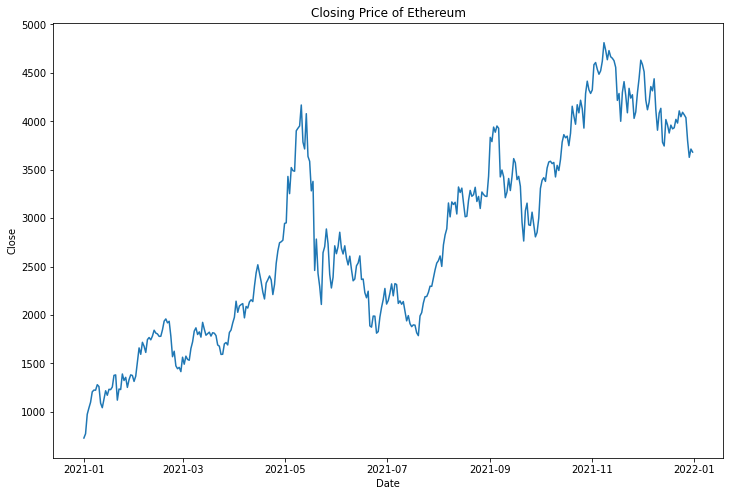

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Closing Price of Ethereum")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(eth['Close'])

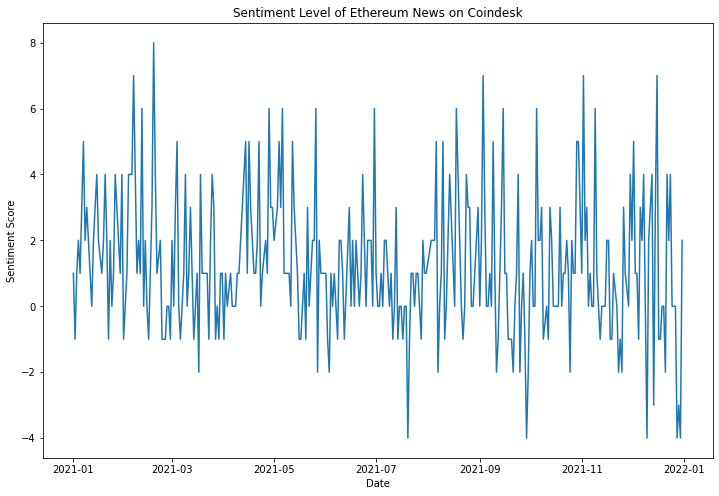

In [ ]:
df['date'] = pd.to_datetime(df['date']) #convert date in string to pandas date
df_by_date = df.copy()
df_by_date.loc[df_by_date['sentiment_labels'] == 1, 'sentiment_score'] = -1 #change negative label to -1
df_by_date.loc[df_by_date['sentiment_labels'] == 0, 'sentiment_score'] = 1 #change positive label to 1
df_by_date.loc[df_by_date['sentiment_labels'] == 2, 'sentiment_score'] = 0 #change neutral label to 0

df_by_date = df_by_date.groupby(by=["date"])

plt.figure(figsize=(12,8))
plt.title("Sentiment Level of Ethereum News on Coindesk")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.plot(list(df_by_date.groups.keys()), df_by_date["sentiment_score"].sum())

In [ ]:
# insert 0 for the date without any news
sentiment_score = df_by_date['sentiment_score'].sum()
sentiment_date = df.reset_index()['date'].unique()
for date in eth.reset_index()['Date']:
  if date not in sentiment_date:
    sentiment_score[date] = 0
sentiment_score = sentiment_score.sort_index()

In [ ]:
a = pd.DataFrame({'Close': df_test['Close'], 
                  'sentiment_score': sentiment_score
                   })
print(a)

                  Close  sentiment_score
2021-01-01   730.367554              1.0
2021-01-02   774.534973             -1.0
2021-01-03   975.507690              1.0
2021-01-04  1040.233032              2.0
2021-01-05  1100.006104              1.0
...                 ...              ...
2021-12-27  4037.547607              0.0
2021-12-28  3800.893066             -4.0
2021-12-29  3628.531738             -3.0
2021-12-30  3713.852051             -4.0
2021-12-31  3682.632812              2.0

[365 rows x 2 columns]


In [ ]:
grangercausalitytests(a, maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1525  , p=0.6964  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.1537  , p=0.6950  , df=1
likelihood ratio test: chi2=0.1537  , p=0.6950  , df=1
parameter F test:         F=0.1525  , p=0.6964  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0851  , p=0.9184  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=0.1726  , p=0.9173  , df=2
likelihood ratio test: chi2=0.1726  , p=0.9173  , df=2
parameter F test:         F=0.0851  , p=0.9184  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0604  , p=0.9805  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=0.1848  , p=0.9800  , df=3
likelihood ratio test: chi2=0.1848  , p=0.9800  , df=3
parameter F test:         F=0.0604  , p=0.9805  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1463  , p=0.9646  

{1: ({'lrtest': (0.15371165521901275, 0.6950133053679639, 1),
   'params_ftest': (0.15247699300836048, 0.6964097222791791, 361.0, 1.0),
   'ssr_chi2test': (0.15374411483392586, 0.6949827212811679, 1),
   'ssr_ftest': (0.15247699300837153, 0.6964097222791791, 361.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.17257918846644316, 0.9173285396955758, 2),
   'params_ftest': (0.08512126510451457, 0.9184194896536424, 358.0, 2.0),
   'ssr_chi2test': (0.17262021917847373, 0.9173097205670422, 2),
   'ssr_ftest': (0.08512126510453663, 0.9184194896536058, 358.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (0.18478986955506116, 0.980006559475912, 3),
   'params_ftest': (0.060420948467513676, 0.980523506270797, 355.0, 3.0),
   'ssr_chi2test': (0.18483704235410953, 0.9799991832064442, 3),
   'ssr_ftest': (0.060420948467503566, 0.9805235062708093, 355.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

Since the p-value is not less than 0.1 (i.e. the significance level: α = .1), the null hypothesis (time series of sentiment scores (news in CoinDesk) does not Granger-cause time series of Ethereuem price) cannot be rejected. We can conclude that the sentiment score obtained from news in CoinDesk is not useful for predicting the future Ethereum price.

In [ ]:
grangercausalitytests(a[['sentiment_score', 'Close']], maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0906  , p=0.7636  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.0914  , p=0.7624  , df=1
likelihood ratio test: chi2=0.0914  , p=0.7624  , df=1
parameter F test:         F=0.0906  , p=0.7636  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.1429 , p=0.0000  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=32.7367 , p=0.0000  , df=2
likelihood ratio test: chi2=31.3437 , p=0.0000  , df=2
parameter F test:         F=16.1429 , p=0.0000  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.3600 , p=0.0000  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=34.7518 , p=0.0000  , df=3
likelihood ratio test: chi2=33.1834 , p=0.0000  , df=3
parameter F test:         F=11.3600 , p=0.0000  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.4366  , p=0.0000  

{1: ({'lrtest': (0.09136827144016024, 0.7624448355244524, 1),
   'params_ftest': (0.09062660993205876, 0.7635553720548938, 361.0, 1.0),
   'ssr_chi2test': (0.09137973965386788, 0.7624303760370086, 1),
   'ssr_ftest': (0.0906266099314459, 0.763555372055604, 361.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (31.343692557516533, 1.5624410473178386e-07, 2),
   'params_ftest': (16.142891342486088, 1.938888796054906e-07, 358.0, 2.0),
   'ssr_chi2test': (32.736701437577054, 7.786021613775821e-08, 2),
   'ssr_ftest': (16.14289134249667, 1.9388887960360424e-07, 358.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (33.183384313638044, 2.9461963883288727e-07, 3),
   'params_ftest': (11.359950583012234, 3.935646025206174e-07, 355.0, 3.0),
   'ssr_chi2test': (34.75184882577828, 1.3745431711539762e-07, 3),
   'ssr_ftest': (11.359950583012237, 3.935646025206174e-07, 355.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 

By performing the Granger-causality test in reverse that the null hypothesis becomes time series of Ethereum price does not Granger-cause time series of sentiment score (news in CoinDesk), the p-value is less than 0.1 (i.e. the significance level: α = .1) with lag larger than 1 day. We can conclude that the most of the news in Coindesk were caused by the Ethereum price.